<a href="https://colab.research.google.com/github/dhamvi01/Factor-Analysis/blob/main/Factor_ANalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 1. Import Libraries

In [3]:
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)

style.use('ggplot')

#### 2. Import data

In [4]:
df= pd.read_csv("bfi.csv")
df.drop(['Unnamed: 0','gender', 'education', 'age'],axis=1,inplace=True)
# Dropping missing values rows
df.dropna(inplace=True)
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


#### 3. Adequecy Test

In [5]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(18170.96635086924, 0.0)

In [6]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.848539722194922

#### 4. Model building

In [9]:
fa = FactorAnalyzer()
fa.fit(df, 25)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

#### 5. Tuning No of factors

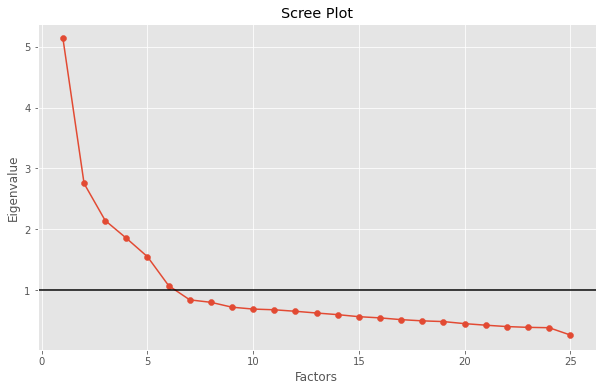

In [12]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1,c='k')

In [39]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.set_params(n_factors=6, rotation='varimax')
fa.fit(df)
eigen_values, vectors = fa.get_eigenvalues()

#### 6. Get factors

In [43]:
v=pd.DataFrame(fa.fit_transform(df))
v.head() 

,0,1,2,3,4,5
0,-0.350506,0.033583,-1.300285,-0.512135,-1.429475,-0.693275
1,0.081829,0.570999,-0.612138,-0.201342,-0.243352,-0.016911
2,0.564684,0.327277,0.083021,-0.824345,0.210169,-0.236172
3,-0.232325,0.071300,-0.963956,-0.268270,-1.187286,0.834096
4,-0.337498,0.364706,-0.137084,-0.798106,-0.675213,-0.190357


#### 7. Visulize factors|

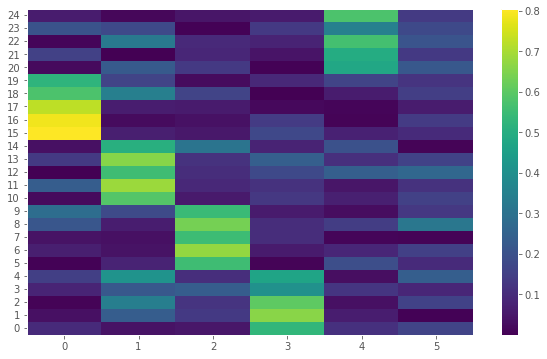

In [47]:
import numpy as np
Z=np.abs(fa.loadings_)
fig, ax = plt.subplots()
c = ax.pcolor(Z)
fig.colorbar(c, ax=ax)
ax.set_yticks(np.arange(fa.loadings_.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(fa.loadings_.shape[1])+0.5, minor=False)
ax.set_yticklabels(v.index)
ax.set_xticklabels(v.columns)
plt.show()

#### 8. Get the variance of each factor

In [61]:
# Get variance of each factors
b = pd.DataFrame(fa.get_factor_variance(),columns=['Facotr' + str(x) for x in range(6)])
b.index = ['SS Loadings','Proportion Var','Cumulative Var']
b

,Facotr0,Facotr1,Facotr2,Facotr3,Facotr4,Facotr5
SS Loadings,2.726989,2.602239,2.073471,1.713499,1.504831,0.630297
Proportion Var,0.109080,0.104090,0.082939,0.068540,0.060193,0.025212
Cumulative Var,0.109080,0.213169,0.296108,0.364648,0.424841,0.450053
